<a href="https://colab.research.google.com/github/mihika073/Deeplearning/blob/main/Mihika_Assignment6_RNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: RNN Implementation
-------------------
**Dr. Dave Wanik - University of Connecticut**
A weather-based energy forecasting homework.

* **Your Name Here:** Mihika Srivastava
* **Your NetID Here:** mis21013

Energy demand forecasting as a function of weather data is an extremely interesting and relevant topic.

I've given you a curated (mostly?) clean dataset that you can use to predict `df['Demand']` as a function of the weather variables. 

Of course, you cannot use the df[`Datetime`] column directly into the model - but you can feature engineer the column to make features temporal features for modeling like Julian day of year (0-365), week of year, and number of years since 2012.

**Sorting: (5 pts)**
Sort the data from oldest to newest.

**Cleaning: (10 pts)**
Describe and impute (or drop) the missing values using an appropriate method. At this time, you are welcome to perform feature engineering (optional).

**Process as a 3D tensor: (10 pts)**
Process the data as a 3D tensor with a lookback of your choice (use a value greater than or equal to 12).

**Model Architecure: (10 pts)**
You must use a model with:
* at least two recurrent layers
* at least one convolution layer
* dropout (recurrent or between Dense layers)
* appropriate activation functions

**Experiments: (15 pts each, 30 pts total)**
Freeze the model architecutre and perform a *walk-forward validation* where:
* the first 50k samples predict the remaining ~46k samples
* the first 80k samples predict the remaining ~16k samples

Walk-forward validation is very common to use on the job - it shows how your model (ideally) gets better over time as it gets more data to use. Use subheads

**Evaluation (15 points each, 30 pts total)**
Evaluate your model for each of these experiments - hopefully, your model should improve as you give it more data to use! But that depends on your choice of architecture. You should have:
* quantitative error metrics (mean absolute error and others)
* scatterplots of actual vs. predicted
* time series plots of actual vs. predicted

You should also compare to baseline model like persistence (assume today's energy usage is the same as yesterday's - requires you to shift by 24... ask on discussion board if questions!) or ignore the sequence data and treat this as a 2D problem (a regular supervised learning problem!)

**Conclusions (5 pts total)**
* What did you learn from this assignment? Did your walk-forward validation work as you expected it to? 
* What else would you do differently next time?
* At least five great bullets please.

In [ ]:
# https://drive.google.com/file/d/1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V/view?usp=sharing
!gdown 1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V

Downloading...
From: https://drive.google.com/uc?id=1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V
To: /content/BDL_cleanweather_energy (1).csv
100% 7.38M/7.38M [00:00<00:00, 246MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('BDL_cleanweather_energy (1).csv')

In [ ]:
df.info()
df.head(n=15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96427 entries, 0 to 96426
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  96427 non-null  object 
 1   Demand    96427 non-null  float64
 2   BDL_tmpf  96160 non-null  float64
 3   BDL_dwpf  96160 non-null  float64
 4   BDL_relh  96160 non-null  float64
 5   BDL_drct  96160 non-null  float64
 6   BDL_sknt  96160 non-null  float64
 7   BDL_p01i  96160 non-null  float64
 8   BDL_alti  96160 non-null  float64
 9   BDL_mslp  96160 non-null  float64
 10  BDL_vsby  96160 non-null  float64
dtypes: float64(10), object(1)
memory usage: 8.1+ MB


,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
0,2019-01-01 00:00:00,2713.617,37.9,37.9,100.00,360.0,4.0,0.0700,29.88,1009.7,5.0
1,2019-01-01 01:00:00,2578.343,37.9,37.9,100.00,360.0,4.0,0.1100,29.79,1006.3,2.0
2,2019-01-01 02:00:00,2467.969,37.9,37.9,100.00,340.0,7.0,0.0100,29.70,1003.3,2.0
3,2019-01-01 03:00:00,2397.140,37.9,37.9,100.00,310.0,6.0,0.0100,29.63,1002.3,1.5
4,2019-01-01 04:00:00,2381.258,37.9,37.9,100.00,140.0,3.0,0.0001,29.58,1001.2,1.5
5,2019-01-01 05:00:00,2422.784,39.9,39.9,100.00,160.0,11.0,0.0000,29.56,1000.4,5.0
6,2019-01-01 06:00:00,2487.799,44.1,44.1,100.00,160.0,11.0,0.0000,29.54,999.8,10.0
7,2019-01-01 07:00:00,2530.716,46.9,46.0,96.66,170.0,11.0,0.0000,29.54,1000.1,10.0
8,2019-01-01 08:00:00,2620.610,48.9,48.0,96.69,170.0,10.0,0.0000,29.56,1000.9,10.0
9,2019-01-01 09:00:00,2794.228,53.6,48.2,86.17,330.0,12.0,0.0000,29.63,1003.1,10.0


##Import useful modules

In [ ]:
# standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RNN-specific modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

##Data Sorting

In [ ]:
#Change the date column to datetime data type
df['Datetime'] = pd.to_datetime(df['Datetime'])
print(type(df.Datetime[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df.head()

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
0,2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
1,2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2,2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
3,2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
4,2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [ ]:
df.sort_values(by=['Datetime'])

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
8760,2011-01-01 00:00:00,3053.00,33.98,26.96,0.00,0.0,0.0,0.0,30.07,1018.5,6.0
8761,2011-01-01 01:00:00,2892.00,33.98,26.96,0.00,0.0,0.0,0.0,30.07,1018.5,6.0
8762,2011-01-01 02:00:00,2774.00,30.92,26.96,0.00,0.0,0.0,0.0,30.07,1018.6,6.0
8763,2011-01-01 03:00:00,2710.00,30.02,26.06,0.00,0.0,0.0,0.0,30.09,1019.2,5.0
8764,2011-01-01 04:00:00,2698.00,28.94,24.98,0.00,0.0,0.0,0.0,30.09,1019.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...
78855,2021-12-31 19:00:00,3310.60,48.00,45.00,89.29,190.0,7.0,0.0,29.95,1014.2,6.0
78856,2021-12-31 20:00:00,3148.00,48.00,46.00,92.74,190.0,5.0,0.0,29.95,1013.8,5.0
78857,2021-12-31 21:00:00,2988.93,48.00,46.00,92.74,170.0,7.0,0.0,29.94,1013.5,5.0
78858,2021-12-31 22:00:00,2793.70,46.90,46.40,100.00,180.0,7.0,0.0,29.94,1013.8,5.0


In [ ]:
#Sorting
df=df.sort_values(by='Datetime')

In [ ]:
df.head()

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
8760,2011-01-01 00:00:00,3053.0,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0
8761,2011-01-01 01:00:00,2892.0,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0
8762,2011-01-01 02:00:00,2774.0,30.92,26.96,0.0,0.0,0.0,0.0,30.07,1018.6,6.0
8763,2011-01-01 03:00:00,2710.0,30.02,26.06,0.0,0.0,0.0,0.0,30.09,1019.2,5.0
8764,2011-01-01 04:00:00,2698.0,28.94,24.98,0.0,0.0,0.0,0.0,30.09,1019.1,5.0


##Data Visualization

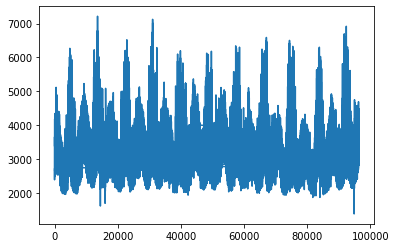

In [ ]:
from matplotlib.pyplot import figure

# visualize the data
df['Demand'].plot()
plt.show()

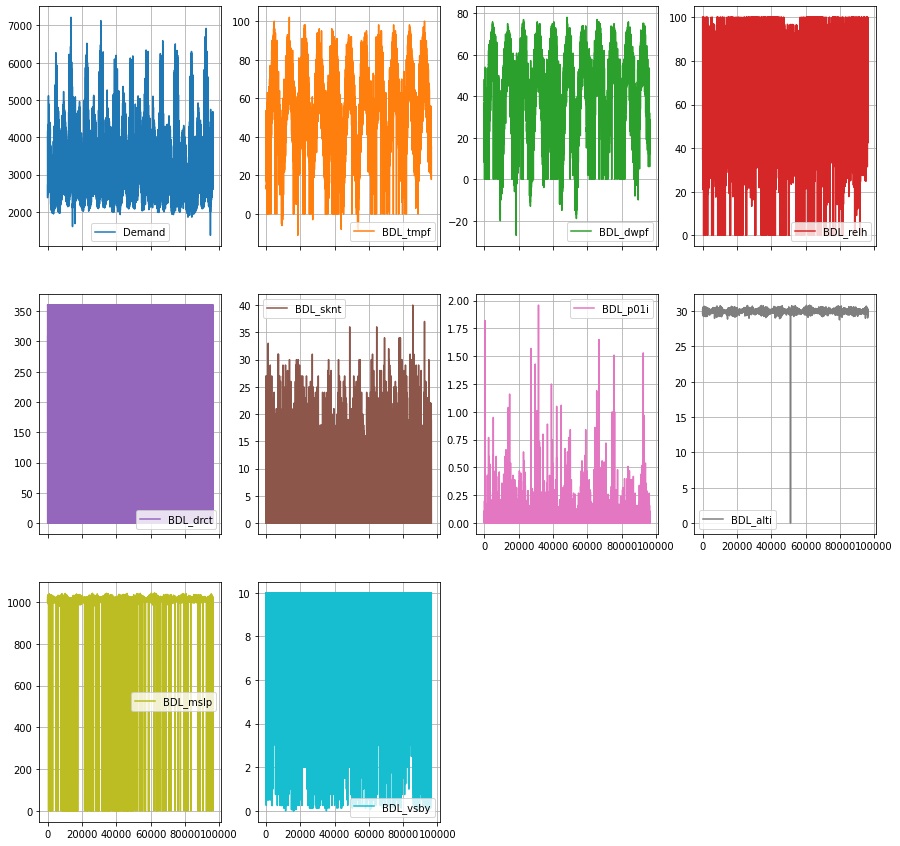

In [ ]:
df.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

In [ ]:
print(df.shape)
df.tail()

(96427, 11)


,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
78855,2021-12-31 19:00:00,3310.60,48.0,45.0,89.29,190.0,7.0,0.0,29.95,1014.2,6.0
78856,2021-12-31 20:00:00,3148.00,48.0,46.0,92.74,190.0,5.0,0.0,29.95,1013.8,5.0
78857,2021-12-31 21:00:00,2988.93,48.0,46.0,92.74,170.0,7.0,0.0,29.94,1013.5,5.0
78858,2021-12-31 22:00:00,2793.70,46.9,46.4,100.00,180.0,7.0,0.0,29.94,1013.8,5.0
78859,2021-12-31 23:00:00,2629.35,48.0,46.0,92.74,160.0,5.0,0.0,29.94,1013.3,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96427 entries, 8760 to 78859
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  96427 non-null  datetime64[ns]
 1   Demand    96427 non-null  float64       
 2   BDL_tmpf  96160 non-null  float64       
 3   BDL_dwpf  96160 non-null  float64       
 4   BDL_relh  96160 non-null  float64       
 5   BDL_drct  96160 non-null  float64       
 6   BDL_sknt  96160 non-null  float64       
 7   BDL_p01i  96160 non-null  float64       
 8   BDL_alti  96160 non-null  float64       
 9   BDL_mslp  96160 non-null  float64       
 10  BDL_vsby  96160 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 8.8 MB


##Data Cleaning

In [ ]:
# Remove the date column
df.drop(['Datetime'], inplace=True, axis=1)
print(df.shape)
df.head()

(96427, 10)


,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
8760,3053.0,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0
8761,2892.0,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0
8762,2774.0,30.92,26.96,0.0,0.0,0.0,0.0,30.07,1018.6,6.0
8763,2710.0,30.02,26.06,0.0,0.0,0.0,0.0,30.09,1019.2,5.0
8764,2698.0,28.94,24.98,0.0,0.0,0.0,0.0,30.09,1019.1,5.0


In [ ]:
#Move the dependent(Y) variable to the end 
df=df[['BDL_tmpf', 'BDL_dwpf', 'BDL_relh', 'BDL_drct', 'BDL_sknt',
       'BDL_p01i', 'BDL_alti', 'BDL_mslp', 'BDL_vsby','Demand']]

In [ ]:
df.head()

,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby,Demand
8760,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0,3053.0
8761,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0,2892.0
8762,30.92,26.96,0.0,0.0,0.0,0.0,30.07,1018.6,6.0,2774.0
8763,30.02,26.06,0.0,0.0,0.0,0.0,30.09,1019.2,5.0,2710.0
8764,28.94,24.98,0.0,0.0,0.0,0.0,30.09,1019.1,5.0,2698.0


In [ ]:
#Check missing values
df.isna().sum()

BDL_tmpf    267
BDL_dwpf    267
BDL_relh    267
BDL_drct    267
BDL_sknt    267
BDL_p01i    267
BDL_alti    267
BDL_mslp    267
BDL_vsby    267
Demand        0
dtype: int64

As the number of missing values are very less as compared to the entire dataset so we can either delete them or impute the values using previous values. We will impute it using previous value as the dataset is already sorted

In [ ]:
# Fill missing values with previous value in the dataset. 
df.fillna(method ='pad',inplace=True)

In [ ]:
#Checking missing values 
df.isna().sum()

BDL_tmpf    0
BDL_dwpf    0
BDL_relh    0
BDL_drct    0
BDL_sknt    0
BDL_p01i    0
BDL_alti    0
BDL_mslp    0
BDL_vsby    0
Demand      0
dtype: int64

## Process as a 3D Tensor

In [ ]:
# prep data for modeling (multivariate)
# link: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

from numpy import array

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:

n_steps = 24 
raw_seq = np.array(df) # Store the data in numpy array
X, y = split_sequences(raw_seq, n_steps=24)

In [ ]:
# take a peak at what it did
print(X.shape)
print(y.shape)

(96404, 24, 9)
(96404,)


In [ ]:
#Check once by printing values generated above
print("Number of samples",len(df)-n_steps+1)
print("Lookback period",n_steps)
print("Number of features",len(df.columns)-1)

Number of samples 96404
Lookback period 24
Number of features 9


##Experiment 1 RNN Model
Training - 50K rows 
Test - 46K rows

Model architecture
1.   Two Recurrent layers
2.   One Convolution layer
3.   Drop out
4.   Max Pooling
5.   Activation Function = Relu

###Data Splitting 

In [ ]:
# split the data into train and test partitions
# we will use 50% of the data for train, and 50% for validation
train_pct_index = 50000
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# pretty slick way of splitting your data using slicing!
# notice how we didn't do any shuffling (we don't want temporal leakage! keeps time series intact)

In [ ]:
# check the shape to be sure
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# verify that this all adds up!
# 96404 samples with 24 lookback and 9 columns

(96404, 24, 9) (50000, 24, 9) (46404, 24, 9)
(96404,) (50000,) (46404,)


###Model building

In [ ]:
# define
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

print(n_steps, n_features)

24 9


In [ ]:
# now let's build a model

# define
n_steps = X_train.shape[1]
n_features = X_train.shape[2]
kernel= 3

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=kernel, input_shape=(n_steps,n_features))) # notice how input shape goes in first layer
model.add(MaxPooling1D(2))
model.add(SimpleRNN(30, activation='relu', return_sequences=True,recurrent_dropout=0.2))
model.add(SimpleRNN(60, activation='relu', 
                    recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 22, 32)            896       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 11, 32)           0         
 1D)                                                             
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 11, 30)            1890      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 60)                5460      
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                      

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=5, 
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=5, 
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Epoch 1/500
8000/8000 [==============================] - 68s 8ms/step - loss: 737565.0625 - mae: 677.7874 - val_loss: 259848.1094 - val_mae: 421.9138
Epoch 2/500
8000/8000 [==============================] - 63s 8ms/step - loss: 414964.5938 - mae: 515.6276 - val_loss: 188062.7188 - val_mae: 357.0785
Epoch 3/500
8000/8000 [==============================] - 62s 8ms/step - loss: 379777.5000 - mae: 492.9257 - val_loss: 169626.5469 - val_mae: 330.4996
Epoch 4/500
8000/8000 [==============================] - 65s 8ms/step - loss: 358172.7812 - mae: 478.0593 - val_loss: 219201.2500 - val_mae: 377.3598
Epoch 5/500
8000/8000 [==============================] - 63s 8ms/step - loss: 344222.7812 - mae: 466.6245 - val_loss: 184523.5625 - val_mae: 346.1151
Epoch 6/500
8000/8000 [==============================] - 63s 8ms/step - loss: 338610.5000 - mae: 461.5015 - val_loss: 190002.6562 - val_mae: 348.5609
Epoch 7/500
8000/8000 [==============================] - 62s 8ms/step - loss: 332409.2188 - mae: 457

### Model Evaluation

In [ ]:

# make a prediction
pred = model.predict(X_test)# the pred
print(pred) # round them!

pred = np.round(pred,0)
print(pred) # run all if you get an error...


1451/1451 [==============================] - 5s 3ms/step
[[3607.4746]
 [3699.2825]
 [3736.116 ]
 ...
 [3204.367 ]
 [3172.351 ]
 [3086.6921]]
[[3607.]
 [3699.]
 [3736.]
 ...
 [3204.]
 [3172.]
 [3087.]]


In [ ]:
# calculate MSE
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test, pred))

MAE:  370.3811909533661


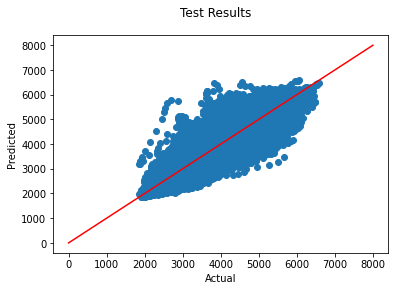

In [ ]:
actual = y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(0,8000) # 45 degree line from 0 to 25 (axes are the same)
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

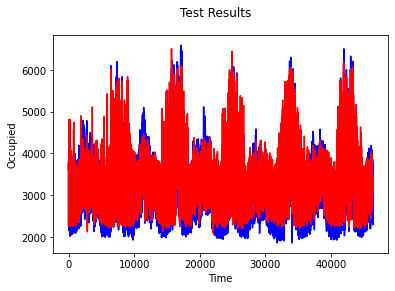

In [ ]:
# show timeseries plot on the train and validation data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Occupied')
plt.show()

## Experiment 2 RNN Model
Training - 80K rows 
Test - 16K rows

Model architecture
1.   Two Recurrent layers
2.   One Convolution layer
3.   Drop out
4.   Max Pooling
5.   Activation Function = Relu

###Data Splitting

In [ ]:
# split the data into train and test partitions
# we will use 50% of the data for train, and 50% for validation
train_pct_index = 80000
X_train_new, X_test_new = X[:train_pct_index], X[train_pct_index:]
y_train_new, y_test_new = y[:train_pct_index], y[train_pct_index:]

# pretty slick way of splitting your data using slicing!
# notice how we didn't do any shuffling (we don't want temporal leakage! keeps time series intact)

In [ ]:
# check the shape to be sure
print(X.shape, X_train_new.shape, X_test_new.shape)
print(y.shape, y_train_new.shape, y_test_new.shape)

# verify that this all adds up!
# 96404 samples with 24 lookback and 9 columns

(96404, 24, 9) (80000, 24, 9) (16404, 24, 9)
(96404,) (80000,) (16404,)


###Model Building

In [ ]:
# define
n_steps = X_train_new.shape[1]
n_features = X_train_new.shape[2]

print(n_steps, n_features)

24 9


In [ ]:
# now let's build a model

# define
n_steps = X_train_new.shape[1]
n_features = X_train_new.shape[2]
kernel= 3

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=kernel, input_shape=(n_steps,n_features))) # notice how input shape goes in first layer
model.add(MaxPooling1D(2))
model.add(SimpleRNN(30, activation='relu', return_sequences=True,recurrent_dropout=0.2))
model.add(SimpleRNN(60, activation='relu', 
                    recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 22, 32)            896       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 11, 32)           0         
 1D)                                                             
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 11, 30)            1890      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 60)                5460      
                                                                 
 dropout_4 (Dropout)         (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                      

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=5, 
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
model.fit(X_train_new, y_train_new, 
          epochs=500, 
          batch_size=5, 
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Epoch 1/500
12800/12800 [==============================] - 167s 8ms/step - loss: 521546.0625 - mae: 565.0238 - val_loss: 211133.9375 - val_mae: 371.6736
Epoch 2/500
12800/12800 [==============================] - 103s 8ms/step - loss: 340652.4062 - mae: 464.5946 - val_loss: 179495.6875 - val_mae: 339.2252
Epoch 3/500
12800/12800 [==============================] - 105s 8ms/step - loss: 317917.8750 - mae: 446.3225 - val_loss: 133150.9375 - val_mae: 292.5398
Epoch 4/500
12800/12800 [==============================] - 100s 8ms/step - loss: 300693.9688 - mae: 433.8156 - val_loss: 199177.0938 - val_mae: 356.5032
Epoch 5/500
12800/12800 [==============================] - 100s 8ms/step - loss: 294995.5625 - mae: 429.4002 - val_loss: 135459.2656 - val_mae: 287.4758
Epoch 6/500
12800/12800 [==============================] - 100s 8ms/step - loss: 290817.5625 - mae: 426.0919 - val_loss: 250843.8125 - val_mae: 408.9221
Epoch 7/500
12800/12800 [==============================] - 102s 8ms/step - loss: 2

###Model Evaluation

In [ ]:

# make a prediction
pred = model.predict(X_test_new)# the pred
print(pred) # round them!

pred = np.round(pred,0)
print(pred) # run all if you get an error...

513/513 [==============================] - 3s 6ms/step
[[3516.1023]
 [3488.4097]
 [3462.2632]
 ...
 [3069.9873]
 [3045.4763]
 [2988.8953]]
[[3516.]
 [3488.]
 [3462.]
 ...
 [3070.]
 [3045.]
 [2989.]]


In [ ]:
# calculate MSE
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test_new, pred))

MAE:  338.5323803950256


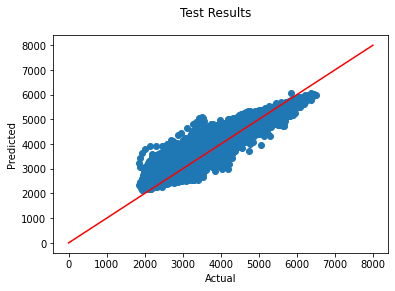

In [ ]:
actual = y_test_new # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(0,8000) # 45 degree line from 0 to 25 (axes are the same)
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

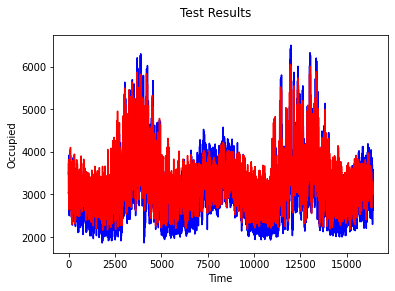

In [ ]:
# show timeseries plot on the train and validation data
plt.plot(np.arange(X_test_new.shape[0]), y_test_new, color='blue') # actual data
plt.plot(np.arange(X_test_new.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Occupied')
plt.show()

##Baseline Model

In [ ]:
# baseline model - prediction is just the previous time step (a tough one to beat!)
df['Baseline'] = df['Demand'].shift(24)
df.tail(10)

,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby,Demand,Baseline
78850,48.0,43.0,82.72,160.0,7.0,0.0,29.93,1013.1,10.0,3196.55,3331.93
78851,48.0,43.0,82.72,180.0,7.0,0.0,29.92,1013.2,10.0,3267.25,3371.52
78852,46.9,44.1,89.92,160.0,8.0,0.0,29.93,1013.4,10.0,3469.12,3537.42
78853,46.9,45.0,93.40,180.0,8.0,0.0,29.93,1013.5,8.0,3588.99,3700.24
78854,48.0,45.0,89.29,190.0,8.0,0.0,29.95,1014.1,7.0,3478.50,3632.95
78855,48.0,45.0,89.29,190.0,7.0,0.0,29.95,1014.2,6.0,3310.60,3508.60
78856,48.0,46.0,92.74,190.0,5.0,0.0,29.95,1013.8,5.0,3148.00,3369.02
78857,48.0,46.0,92.74,170.0,7.0,0.0,29.94,1013.5,5.0,2988.93,3176.76
78858,46.9,46.4,100.00,180.0,7.0,0.0,29.94,1013.8,5.0,2793.70,2936.60
78859,48.0,46.0,92.74,160.0,5.0,0.0,29.94,1013.3,4.0,2629.35,2692.52


In [ ]:
y_test_baseline = df['Baseline']
# just extract rows corresponding to y_test
y_test_baseline = y_test_baseline.tail(y_test.shape[0])
# verify shape
print(y_test.shape)
print(y_test_baseline.shape) # good!

(46404,)
(46404,)


MAE:  239.2162805146108


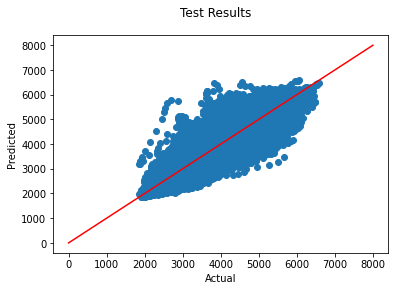

In [ ]:
pred = y_test_baseline # the pred
actual = y_test # the actual

# calculate MSE for the baseline model
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test, pred))


plt.scatter(x=actual, y=pred)
x = np.linspace(0,8000) # 45 degree line from 0 to 25 (axes are the same)
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
# looks pretty good!

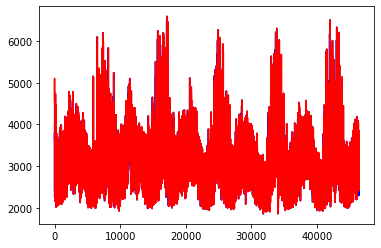

In [ ]:
# show timeseries plot on the train and validation data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.show()
# looks good, BUT it's not a smart model! all the data is just shifted.

In [ ]:
# calculate MSE for the baseline model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

239.2162805146108

##Conclusion
**What did you learn from this assignment? Did your walk-forward validation work as you expected it to?**

**What else would you do differently next time?**



1.   I learned in-depth implementation of RNN with Convolutional and Maxpooling layers. For this particular assignment, SimpleRNN with 2 layers and 1 convolutional and 1 maxpool layer worked best for me. 

2.   I started with a lookback period of 12 hours but eventually, after several trials, the lookback period of 24 hours gave better results. I also tweaked other hyperparameters, such as filters, kernel size, etc. After a number of different values, the ones mentioned in the assignment gave the best results.

3.   As expected, walk-forward validation gave better results. As I increased the number of training data points from 50K to 80K while keeping my model architecture intact, my Mean absolute error value dropped from 370 to 338, which indicates that the error decreased as we increased the data points. 

4.   I also observed that the model takes more time to run as I increase the lookback period. For instance, when my lookback period was 12, my model took approximately 9 minutes to run, but when I increased it to 24, it took almost 19 minutes. 

5.   Using multiple LSTM instead of Simple RNN along with 1 convolution and 1 maxpool layer resulted in an MAE value of almost 650, and the model also took 26 minutes to run. 

6. Compared to the baseline model, which has an MAE value of 239, my model 1 value was 370, and my model 2 value was 338, which was a decent enough result from my perspective.

7.   The model converged at the epoch value of 12 and 8, respectively, for models 1 and 2 with the help of early stopping. 

8.   In response to the question what I would do differently next time- "Rather than having it all in one file and running it, I would create multiple files for different models the next time. Parallelizing files will increase time efficiency. I would also like to improve my hyper parameter tuning ability. 















